In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def Planck(wavelength: np.ndarray, temperature: float, h: float = 6.62e-34, boltzmann: float = 1.38e-23, speed_of_light: float = 3e8) -> np.ndarray:
    wavelength_five: np.ndarray = wavelength**5
    exponent_component: np.ndarray = wavelength*temperature*boltzmann
    exponent_minus_one: np.ndarray = np.exp(h*speed_of_light/exponent_component) - 1
    return (8*np.pi*h*speed_of_light/wavelength_five) * (1/exponent_minus_one)

In [86]:
def Wien(wavelength: np.ndarray, temperature: float, h: float = 6.62e-34, boltzmann: float = 1.38e-23, speed_of_light: float=3e8) -> np.ndarray:
    wavelength_five: np.ndarray = wavelength**5
    exponent_component: np.ndarray = wavelength*temperature*boltzmann
    exponent_minus_one: np.ndarray = np.exp(h*speed_of_light/exponent_component)
    return (2*h*speed_of_light**2/wavelength_five) * (1/exponent_minus_one) * 1e-7

In [113]:
def RayleighJeans(wavelength: np.ndarray, temperature: float, h: float=6.62e-34, boltzmann: float = 1.38e-23, speed_of_light: float = 3e8) -> np.ndarray:
    wavelength_four: np.ndarray = wavelength**4
    numerator: float = boltzmann*temperature
    return 8*np.pi * numerator / wavelength_four / 10

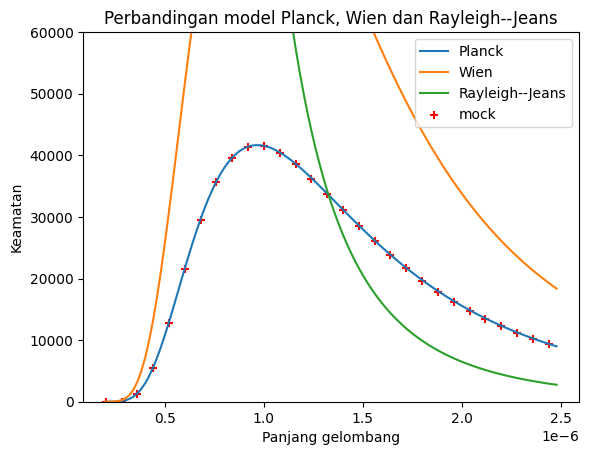

In [119]:
wavelength: np.ndarray = np.arange(0.000_000_2, 0.000_002_5, step=0.2e-7)
temperature: float = 3_000

plt.plot(wavelength, Planck(wavelength, temperature), label='Planck')
plt.plot(wavelength, Wien(wavelength, temperature), label='Wien')
plt.plot(wavelength, RayleighJeans(wavelength, temperature), label='Rayleigh--Jeans')


wavelength_random: np.ndarray = np.arange(0.000_000_2, 0.000_002_5, step=0.8e-7)

x_rand = Planck(wavelength_random, temperature) + np.random.default_rng(200).integers(low=-100, high=100)

plt.scatter(wavelength_random, x_rand, label='mock', marker='+', color='red')

plt.ylim(0, 60_000)
plt.xlabel('Panjang gelombang')
plt.ylabel('Keamatan')
plt.title('Perbandingan model Planck, Wien dan Rayleigh--Jeans')
plt.legend()
plt.show()